In [203]:
# Multiclass segmentation on the reutar dataset

In [204]:
import numpy as np
import keras

In [205]:
dataset = keras.datasets.reuters.load_data(num_words=10_000)

In [206]:
(train_x, train_y), (test_x, test_y) = dataset

In [207]:
print('train x shape: ', train_x.shape)
print('train y shape: ', train_y.shape)
print('test x shape: ', test_x.shape)
print('test y shape: ', test_y.shape)

train x shape:  (8982,)
train y shape:  (8982,)
test x shape:  (2246,)
test y shape:  (2246,)


In [208]:
from sklearn.model_selection import train_test_split 

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.25)

print(type(train_x))

<class 'numpy.ndarray'>


In [209]:
print('train x shape: ', train_x.shape)
print('train y shape: ', train_y.shape)
print('validation x shape: ', val_x.shape)
print('validation y shape: ', val_y.shape)

train x shape:  (6736,)
train y shape:  (6736,)
validation x shape:  (2246,)
validation y shape:  (2246,)


In [210]:
# Data analysis
train_x[0]

[1,
 53,
 492,
 26,
 14,
 119,
 26,
 39,
 32,
 3658,
 18,
 14,
 19,
 3661,
 18,
 88,
 1012,
 61,
 11,
 14,
 635,
 72,
 11,
 29,
 53,
 1013,
 26,
 14,
 750,
 26,
 39,
 59,
 2853,
 18,
 14,
 47,
 2817,
 18,
 88,
 3411,
 47,
 11,
 14,
 3114,
 61,
 11,
 123,
 255,
 29,
 39,
 286,
 1025,
 235,
 32,
 251,
 18,
 150,
 728,
 22,
 211,
 5,
 7953,
 2,
 912,
 17,
 12]

In [211]:
print(np.min(test_y), np.max(test_y))

0 45


In [212]:
train_y[0:10]

array([ 3, 22, 19,  3,  8, 14,  4,  3,  3,  3], dtype=int64)

In [213]:
# Train_x is full of indices to words.
word_index = keras.datasets.reuters.get_word_index()

word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [214]:
# Get mapping from index to word

index_to_word_map = dict([(value, key) for (key, value) in word_index.items()])
index_to_word_map

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [215]:
for i in range(10):
    print(index_to_word_map[train_x[0][i]])

the
lt
banking
year
reuter
production
year
an
billion
332


In [221]:
# Make a 2D array where x index is the word indices, and y index is from 0 to 10,000.
# 1 Will be entered if that word index is part of the sentence.
def vectorize(seq):
    results = np.zeros((len(seq), 10_000))
    for i, sequence in enumerate(seq):
        results[i, sequence] = 1
    return results

train_x = vectorize(train_x)
test_x = vectorize(test_x)

val_x = vectorize(val_x)

In [217]:
from keras.utils import to_categorical

train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

val_y = to_categorical(val_y)

In [218]:
train_x.shape

(6736,)

In [222]:
# Create the model.

model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(10_000,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [223]:
history = model.fit(train_x, train_y, batch_size=512, epochs=20, validation_data=[val_x, val_y])

Epoch 1/20
14/14 [==============================] - 2s 84ms/step - loss: 2.9265 - accuracy: 0.4645 - val_loss: 2.0455 - val_accuracy: 0.5926
Epoch 2/20
14/14 [==============================] - 0s 31ms/step - loss: 1.6692 - accuracy: 0.6695 - val_loss: 1.5418 - val_accuracy: 0.6656
Epoch 3/20
14/14 [==============================] - 0s 31ms/step - loss: 1.2518 - accuracy: 0.7363 - val_loss: 1.3548 - val_accuracy: 0.6874
Epoch 4/20
14/14 [==============================] - 0s 30ms/step - loss: 1.0145 - accuracy: 0.7833 - val_loss: 1.1910 - val_accuracy: 0.7498
Epoch 5/20
14/14 [==============================] - 0s 31ms/step - loss: 0.8475 - accuracy: 0.8198 - val_loss: 1.1156 - val_accuracy: 0.7698
Epoch 6/20
14/14 [==============================] - 0s 31ms/step - loss: 0.7082 - accuracy: 0.8478 - val_loss: 1.0730 - val_accuracy: 0.7725
Epoch 7/20
14/14 [==============================] - 0s 35ms/step - loss: 0.5942 - accuracy: 0.8722 - val_loss: 1.0066 - val_accuracy: 0.7925
Epoch 8/20
14

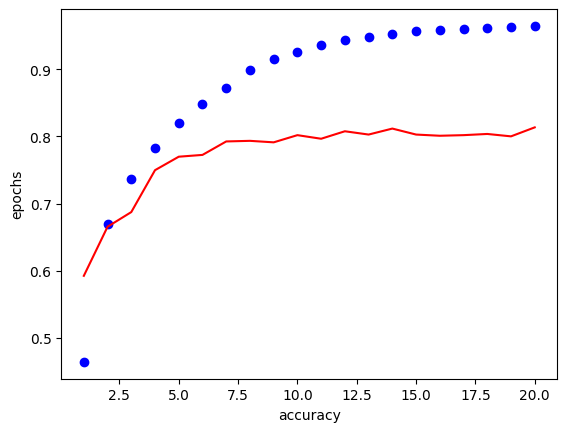

In [234]:
# Visualization

import matplotlib.pyplot as plt

# Epochs vs train/test accuracy
epochs = range(1,21)

plt.xlabel('accuracy')
plt.ylabel('epochs')
plt.plot(epochs, history.history['accuracy'], 'bo', label='train acc')
plt.plot(epochs, history.history['val_accuracy'], 'r', label='val acc')

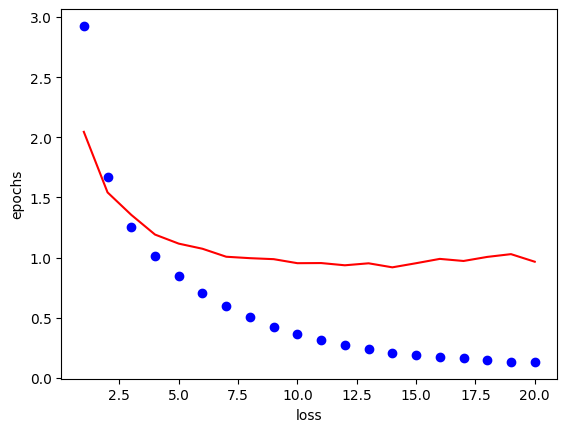

In [235]:
# Visualization

import matplotlib.pyplot as plt

# Epochs vs train/test loss
epochs = range(1,21)

plt.xlabel('loss')
plt.ylabel('epochs')
plt.plot(epochs, history.history['loss'], 'bo', label='train loss')
plt.plot(epochs, history.history['val_loss'], 'r', label='val loss')